In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
df = pd.read_csv("yRL167_mutants.csv")
df

,date,strain,number,dots,cells
0,141124,167,1,16,57
1,141124,167,1,10,45
2,141124,167,1,6,53
3,141124,167,2,18,53
4,141124,167,2,14,55
5,141124,167,2,14,64
6,141124,167,3,10,59
7,141124,167,3,6,47
8,141124,1341,1,11,83
9,141124,1341,1,14,91


In [3]:
# calculate SE / cells (%)
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,strain,number,date,dots,cells,SE
0,167,1,423372,32,155,20.645161
1,167,2,423372,46,172,26.744186
2,167,3,282248,16,106,15.094340
3,1341,1,282248,25,174,14.367816
4,1341,2,282248,21,141,14.893617
5,1341,3,423372,22,137,16.058394
6,1360,1,282248,18,163,11.042945
7,1360,2,423372,24,168,14.285714
8,1360,3,282248,24,137,17.518248
9,1362,1,423372,4,175,2.285714


In [4]:
# calculate average & sem of SE number in different mutants
# WT, atg21D, hsv2D, vps26D
SE_mean = df_number.groupby("strain").mean()["SE"].values
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

[20.82789565 15.10660909 14.28230242  3.0932964 ]
[3.3642619  0.49951235 1.86925986 0.40755584]


## Welth's t-test collected with Holm-sidak

In [5]:
WT_SE = df_number[df_number["strain"] == 167]["SE"]
atg21_SE = df_number[df_number["strain"] == 1341]["SE"]
hsv2_SE = df_number[df_number["strain"] == 1360]["SE"]
vps26_SE = df_number[df_number["strain"] == 1362]["SE"]

In [6]:
statistic, atg21_pvalue = stats.ttest_ind(WT_SE, atg21_SE, equal_var=False)
atg21_pvalue

0.22929601894989368

In [7]:
statistic, hsv2_pvalue = stats.ttest_ind(WT_SE, hsv2_SE, equal_var=False)
hsv2_pvalue

0.18381746198456228

In [8]:
statistic, vps26_pvalue = stats.ttest_ind(WT_SE, vps26_SE, equal_var=False)
vps26_pvalue

0.032559900555990916

In [9]:
multipletests(pvals=[atg21_pvalue, hsv2_pvalue, vps26_pvalue], alpha=0.05, method="holm-sidak")

(array([False, False, False]),
 array([0.33384606, 0.33384606, 0.09453378]),
 0.016952427508441503,
 0.016666666666666666)

## PROPPIN mutants figure (WT, atg21D, hsv2D)

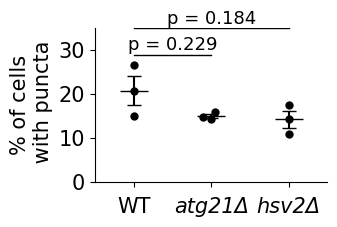

In [29]:
y = -7
fontsize=15
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=df_number.iloc[:9], size=6, color="black")
ax.errorbar(x=[0, 1, 2], y=SE_mean[0:3], yerr=SE_sem[0:3], capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg21Δ", ha="center", fontstyle="italic", fontsize=fontsize)
ax.text(2, y, "hsv2Δ", ha="center", fontstyle="italic", fontsize=fontsize)
# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([0, 1], [29, 29], color='k', lw=1)
ax.text(0.5, 30, f'p = {atg21_pvalue:.3f}', ha='center', fontsize=fontsize-2)
ax.plot([0, 2], [35, 35], color='k', lw=1)
ax.text(1, 36, f'p = {hsv2_pvalue:.3f}', ha='center', fontsize=fontsize-2)

# x and y axis
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_ylim(0, 35)
ax.set_xlim(-0.5, 2.5)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

fig.savefig("output.jpg", bbox_inches="tight")

## vps26 mutants figure (WT, vps26D)

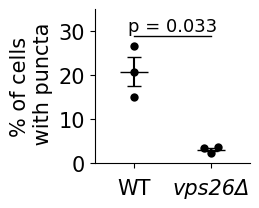

In [33]:
y = -7
fontsize=15

fig, ax = plt.subplots(figsize = (2, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=pd.concat([df_number.iloc[:3], df_number.iloc[9:]], axis=0), size=6, color="black")
ax.errorbar(x=[0, 1], y=SE_mean[[0, 3]], yerr=SE_sem[[0, 3]], capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "vps26Δ", ha="center", fontstyle="italic", fontsize=fontsize)

ax.plot([0, 1], [29, 29], color='k', lw=1)
ax.text(0.5, 30, f'p = {vps26_pvalue:.3f}', ha='center', fontsize=fontsize-2)
# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x and y axis
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 35)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

fig.savefig("output_vps26D.jpg", bbox_inches="tight")